# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [10]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as path
from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [11]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(9.1994)


## Sampling from categorical probabilities with given probabilities

In [12]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

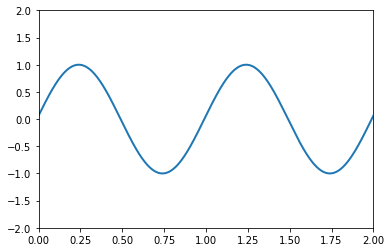

In [13]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

[-3.27013633 -3.06617952 -2.86222271 -2.6582659  -2.45430909 -2.25035228
 -2.04639547 -1.84243866 -1.63848185 -1.43452504 -1.23056823 -1.02661142
 -0.82265461 -0.6186978  -0.41474099 -0.21078418 -0.00682737  0.19712944
  0.40108625  0.60504306  0.80899987  1.01295668  1.21691349  1.4208703
  1.62482711  1.82878392  2.03274073  2.23669754  2.44065435  2.64461116] [ 0.009806    0.004903    0.004903    0.009806    0.014709    0.04412699
  0.03922399  0.06864198  0.11767197  0.15689596  0.15199296  0.20102295
  0.32850092  0.36282191  0.4069489   0.48049388  0.4020459   0.30888893
  0.36282191  0.25495594  0.28927693  0.23534394  0.19611995  0.14218697
  0.11276897  0.06864198  0.05393299  0.03922399  0.019612    0.014709  ]


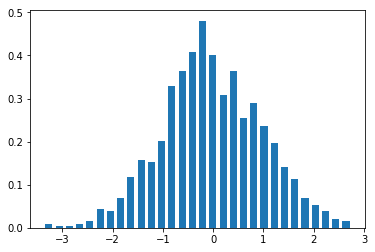

In [20]:
x = np.random.normal(size = 1000)
hist, bins = np.histogram(x, density=True, bins=30)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

## Task 1

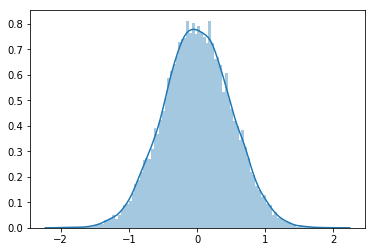

In [81]:
import pyro
import torch
import seaborn as sns
from matplotlib import animation, rc
from IPython.display import HTML

def animate2():
    
    fig, ax = plt.subplots()

    ax.set_xlim((-2,2))
    ax.set_ylim((0,1.5))
    
    mi = 0
    sigma = 0.5
    data = []
    
    def animate(i):
        data.extend([pyro.sample("normal_sampling", pyro.distributions.Normal(mi, sigma)) for _ in range(200)])
        ax.clear()
        sns.distplot(data, bins=100)
    
    def init():
        line.set_data([], [])
        return (line,)
    
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)
    return HTML(anim.to_jshtml())

animate2()

## Task 2

In [ ]:
## Insert solution here